# Travel Package Purchase Prediction Project

## Context

As a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Dataset:

- **CustomerID**: Unique customer ID
- **ProdTaken**: Whether the customer has purchased a package or not (0: No, 1: Yes)
- **Age**: Age of customer
- **TypeofContact**: How customer was contacted (Company Invited or Self Inquiry)
- **CityTier**: City tier depends on the development of a city, population, facilities, and living standards. The categories are -ordered i.e. Tier 1 > Tier 2 > Tier 3
- **DurationOfPitch**: Duration of the pitch by a salesperson to the customer
- **Occupation**: Occupation of customer
- **Gender**: Gender of customer
- **NumberOfPersonVisiting**: Total number of persons planning to take the trip with the customer
- **NumberOfFollowups**: Total number of follow-ups has been done by sales person after sales pitch
- **ProductPitched**: Product pitched by the salesperson
- **PreferredPropertyStar**: Preferred hotel property rating by customer
- **MaritalStatus**: Marital status of customer
- **NumberOfTrips**: Average number of trips in a year by customer
- **Passport**: The customer has a passport or not (0: No, 1: Yes)
- **PitchSatisfactionScore**: Sales pitch satisfaction score
- **OwnCar**: Whether the customers own a car or not (0: No, 1: Yes)
- **NumberOfChildrenVisiting**: Total number of children with age less than 5 planning to take the trip with the customer
- **Designation**: Designation of the customer in the current organization
- **MonthlyIncome**: Gross monthly income of the customer

## 1. Import the libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Bagging libraries
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Boosting libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

## 2. Loading and Exploring the Dataset

In [2]:
travelData = pd.read_excel("Tourism.xlsx")

travelData.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [3]:
travelData.shape

(4888, 20)

In [4]:
travelData['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [5]:
print(travelData['Occupation'].value_counts())
print("")
print(travelData['ProductPitched'].value_counts())
print("")
print(travelData['MaritalStatus'].value_counts())
print("")
print(travelData['Designation'].value_counts())


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


In [6]:
travelData.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Check the data types of the columns for the dataset

In [7]:
travelData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Lets convert the columns with an 'object' datatype into categorical variables

In [8]:
for feature in travelData.columns: # Loop through all columns in the dataframe
    if travelData[feature].dtype == 'object': # Only apply for columns with categorical strings
        travelData[feature] = pd.Categorical(travelData[feature])# Replace strings with an integer
travelData.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [9]:
print(travelData.TypeofContact.value_counts())
print("")
print(travelData.Occupation.value_counts())
print("")
print(travelData.Gender.value_counts())
print("")
print(travelData.ProductPitched.value_counts())
print("")
print(travelData.MaritalStatus.value_counts())
print("")
print(travelData.Designation.value_counts())

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


In [10]:
travelData['Gender'] = travelData['Gender'].replace(['Fe Male'],'Female')
print(travelData.Gender.value_counts())


Male      2916
Female    1972
Name: Gender, dtype: int64


In [11]:
replaceStruct = {
                "Occupation":     {"Salaried": 1, "Small Business": 2 ,"Large Business": 3 ,"Free Lancer":4},
                "TypeofContact": {"Self Enquiry": 1, "Company Invited": 2},
                "ProductPitched": {"Basic": 1, "Deluxe":2 , "Standard": 3, "Super Deluxe": 4,"King": 5},
                 "MaritalStatus": {"Married": 1, "Divorced":2 , "Single": 3, "Unmarried": 4},
                "Designation":     {"Executive": 1, "Manager": 2, "Senior Manager": 3, "AVP": 4, "VP":5 }
                    }
oneHotCols=["Gender"]

In [12]:
travelData=travelData.replace(replaceStruct)
travelData=pd.get_dummies(travelData, columns=oneHotCols)
travelData.head(30)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Gender_Female,Gender_Male
0,200000,1,41.0,1.0,3,6.0,1,3,3.0,2,...,3,1.0,1,2,1,0.0,2,20993.0,1,0
1,200001,0,49.0,2.0,1,14.0,1,3,4.0,2,...,2,2.0,0,3,1,2.0,2,20130.0,0,1
2,200002,1,37.0,1.0,1,8.0,4,3,4.0,1,...,3,7.0,1,3,0,0.0,1,17090.0,0,1
3,200003,0,33.0,2.0,1,9.0,1,2,3.0,1,...,2,2.0,1,5,1,1.0,1,17909.0,1,0
4,200004,0,NaN,1.0,1,8.0,2,2,3.0,1,...,2,1.0,0,5,1,0.0,1,18468.0,0,1
5,200005,0,32.0,2.0,1,8.0,1,3,3.0,1,...,3,1.0,0,5,1,1.0,1,18068.0,0,1
6,200006,0,59.0,1.0,1,9.0,2,2,2.0,1,...,2,5.0,1,2,1,1.0,1,17670.0,1,0
7,200007,0,30.0,1.0,1,30.0,1,3,3.0,1,...,1,2.0,0,2,0,1.0,1,17693.0,0,1
8,200008,0,38.0,2.0,1,29.0,1,2,4.0,3,...,4,1.0,0,3,0,0.0,3,24526.0,0,1
9,200009,0,36.0,1.0,1,33.0,2,3,3.0,2,...,2,7.0,0,3,1,0.0,2,20237.0,0,1


In [13]:
print(travelData["MaritalStatus"])

0       3
1       2
2       3
3       2
4       2
       ..
4883    4
4884    3
4885    1
4886    3
4887    4
Name: MaritalStatus, Length: 4888, dtype: int64


In [14]:
travelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   float64
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   int64  
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   int64  
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   int64  
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

## EDA
## Univariate Analysis

**Please see in Business Recommendations for the complete customer profile.**

In [15]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

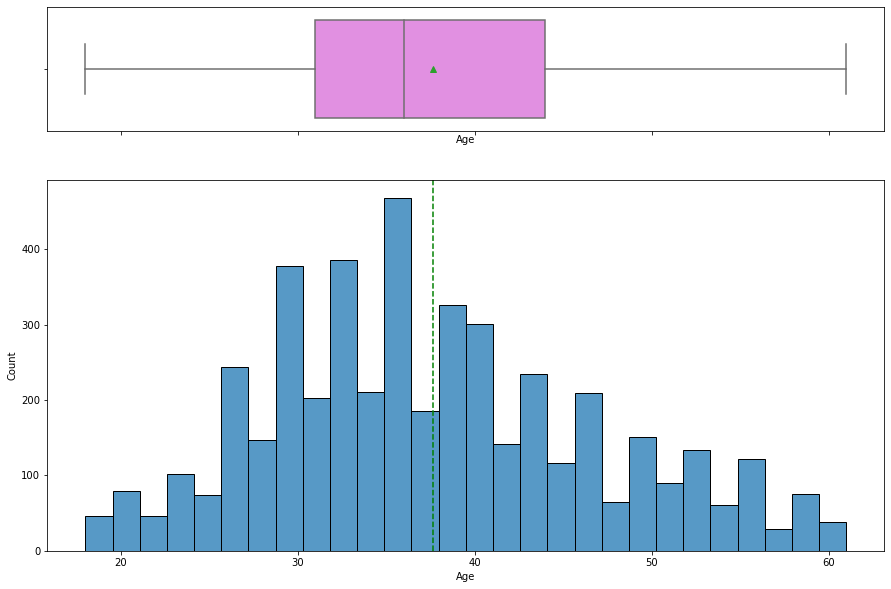

In [16]:
histogram_boxplot(travelData['Age'])

- The mean age is around 37.6 and looks to be normally distributed

### Observations on DurationOfPitch

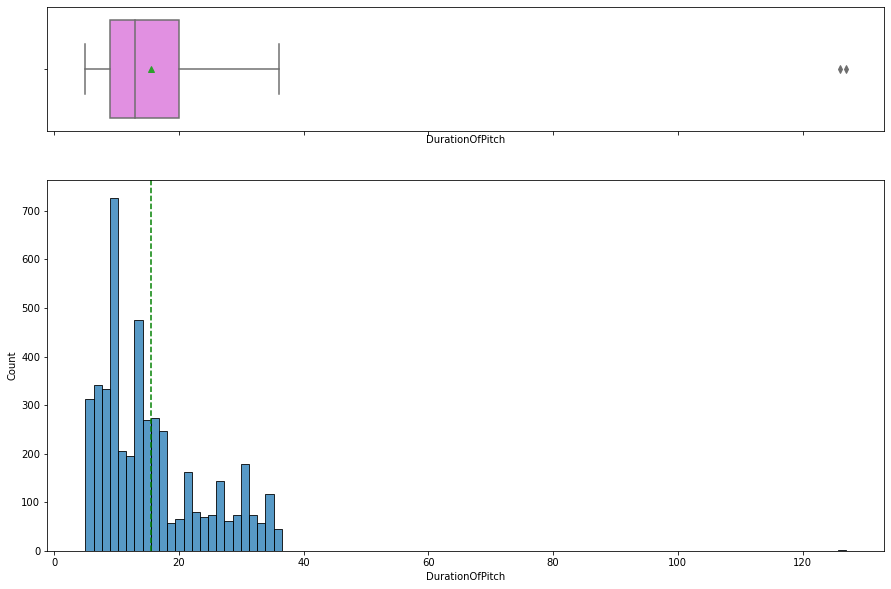

In [17]:
histogram_boxplot(travelData['DurationOfPitch'])

- The mean of DurationOfPitch is around 15.5

### Observations on MonthlyIncome

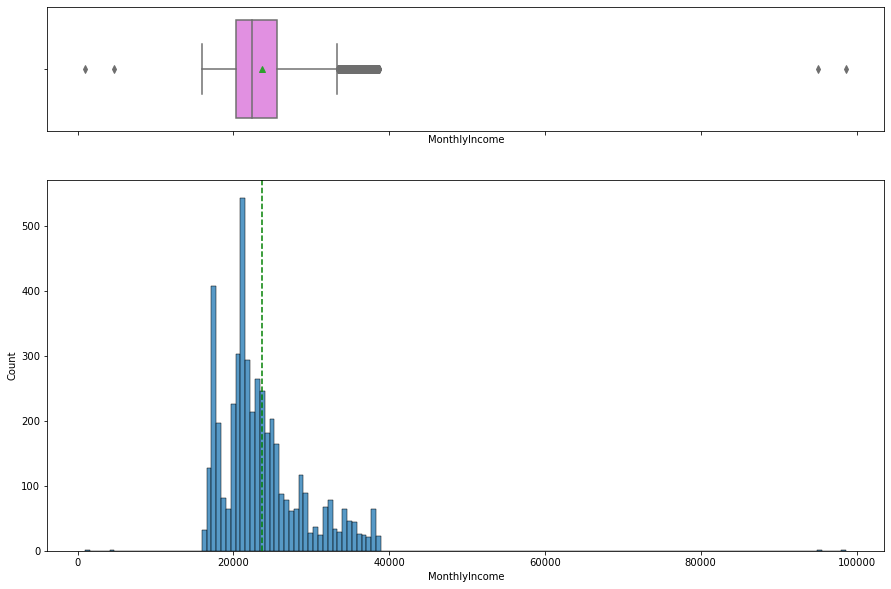

In [18]:
histogram_boxplot(travelData['MonthlyIncome'])

- The mean of MonthlyIncome is around 23619.8

In [19]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(travelData[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(travelData[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on ProdTaken

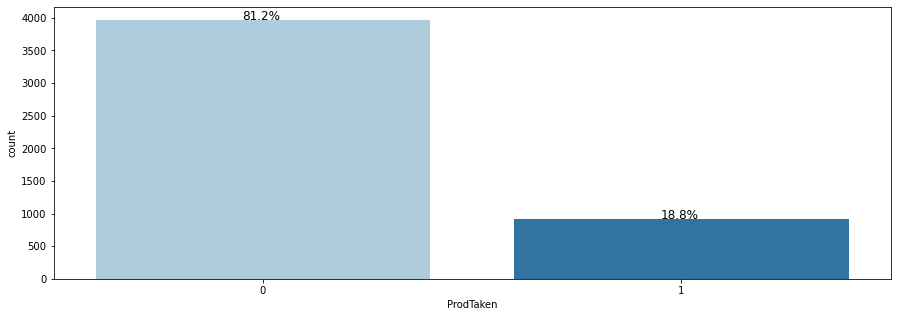

In [20]:
perc_on_bar('ProdTaken')

- 81.2% of the customers didn't purchase the travel package 

### Observations on TypeOfContact

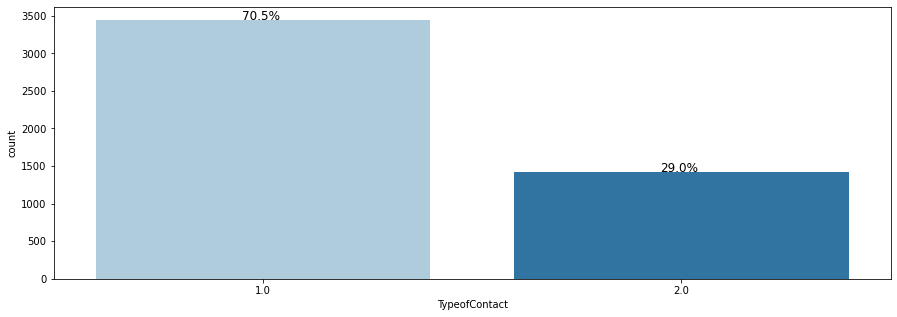

In [21]:
perc_on_bar('TypeofContact')

- 70.5% of the customers were contacted through self enquiry
- 29% of the customers were contacted through company invited

### Observations on CityTier

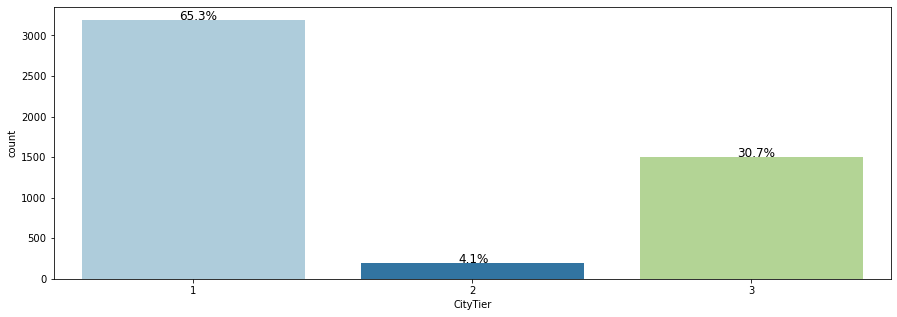

In [22]:
perc_on_bar('CityTier')

- 65.3% of the customers live in Tier 1
- 4.1% of the customers live in Tier 2
- 30.7% of the customers live in Tier 3

### Observations on Occupation

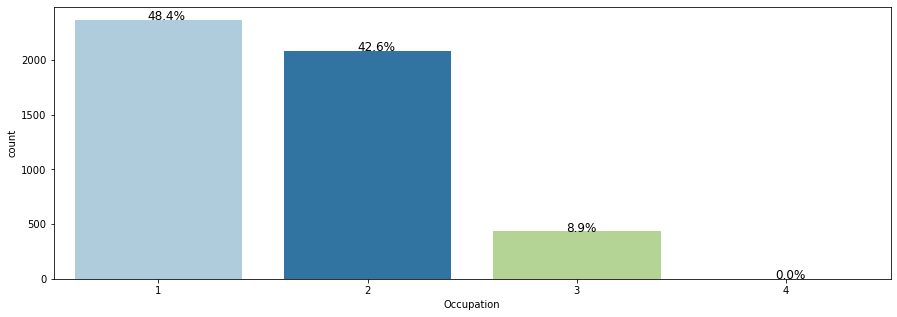

In [23]:
perc_on_bar('Occupation')

- 48.4% of the customers have a salaried occupation
- 42.6% of the customers have a small business occupation
- 8.9% of the customers have a large business occupation
- A very tiny percent of the customers (2 customers) are free lancers

### Observations on NumberOfPersonVisiting

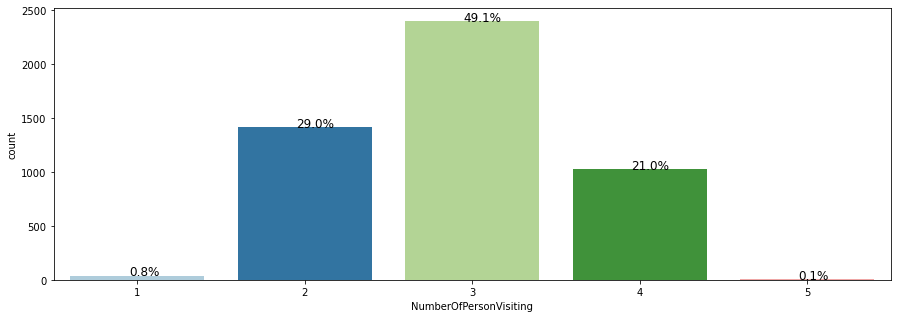

In [24]:
perc_on_bar('NumberOfPersonVisiting')

- 0.8% of the customers are travelling with 1 person
- 29% of the customers are travelling with 2 people
- 49.1% of the customers are travelling with 3 people
- 21% of the customers are travelling with 4 people
- 0.1% of the customers are travelling with 5 people

### Observations on NumberOfFollowups

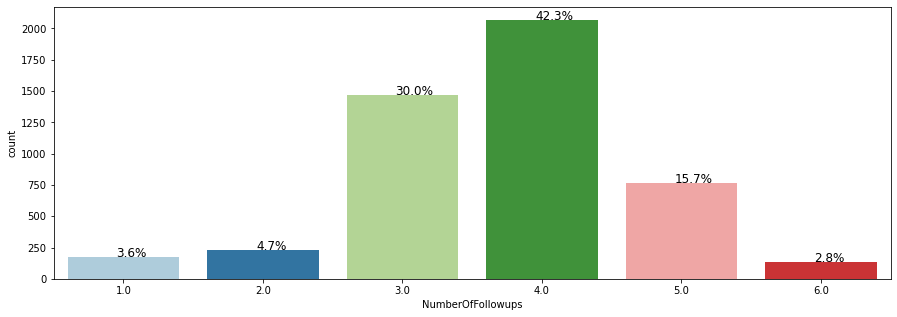

In [25]:
perc_on_bar('NumberOfFollowups')

- 3.6% of the customers had only 1 follow up after the sales pitch
- 4.7% of the customers had 2 follow ups after the sales pitch
- 30% of the customers had 3 follow ups after the sales pitch
- 42.3% of the customers had 4 follow ups after the sales pitch
- 15.7% of the customers had 5 follow ups after the sales pitch
- 2.8% of the customers had 6 follow ups after the sales pitch

### Observations on ProductPitched

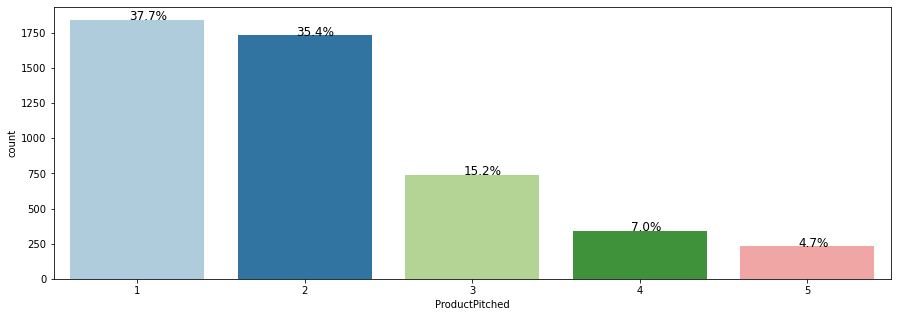

In [26]:
perc_on_bar('ProductPitched')

- 37.7% of the products pitched is a basic package
- 35.4% of the products pitched is a deluxe package
- 15.2% of the products pitched is a standard package
- 7% of the products pitched is a super deluxe package
- 4.7% of the products pitched is a king package

### Observations on PreferredPropertyStar

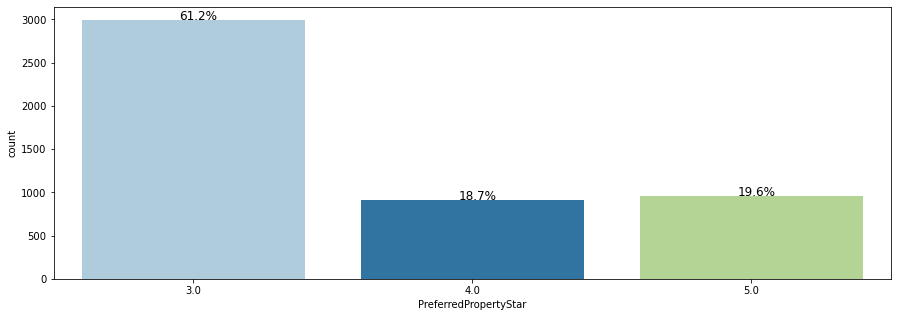

In [27]:
perc_on_bar('PreferredPropertyStar')

- 61.2% of the customers prefer 3 stars
- 18.7% of the customers prefer 4 stars
- 19.6% of the customers prefer 5 stars

### Observations on MaritalStatus

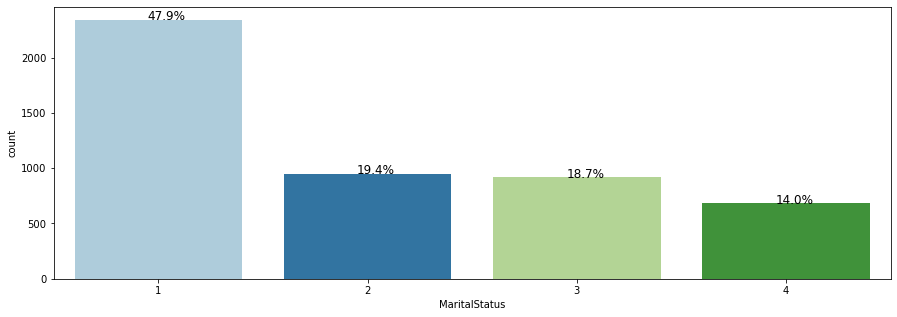

In [28]:
perc_on_bar('MaritalStatus')

- 47.9% of the customers are married
- 19.4% of the customers are divorced
- 18.7% of the customers are single
- 14% of the customers are unmarried (in a relationship but not married)

### Observations on NumberOfTrips

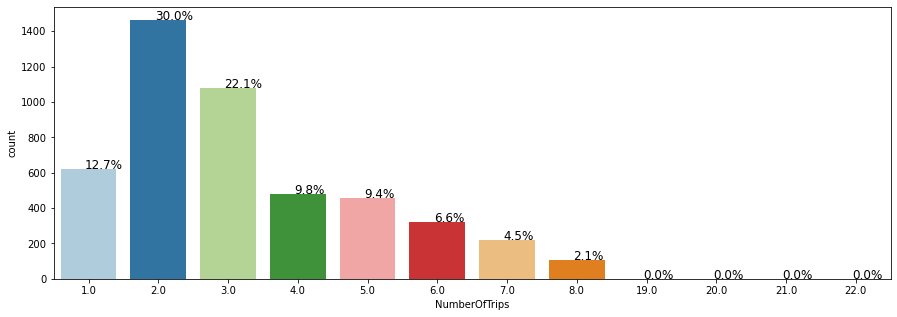

In [29]:
perc_on_bar('NumberOfTrips')

- The biggest portion (30%) of customers take an average of 2 trips a year
- This is followed by 22.1% of the customers who take an average of 3 trips a year
- 12.7% of the customers take an average of 1 trip a year
- 35.2% of the customers take anywhere from 4 to 22 trips a year - this appears to be a right skewed distribution

### Observations on Passport

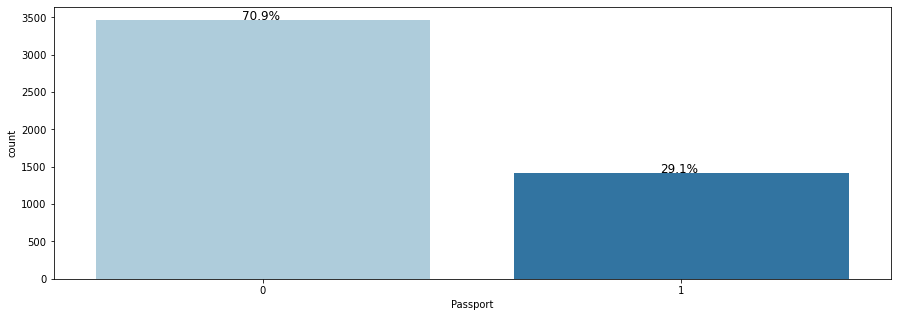

In [30]:
perc_on_bar('Passport')

- 70.9% of the customers don't have a passport

### Observations on PitchSatisfactionScore

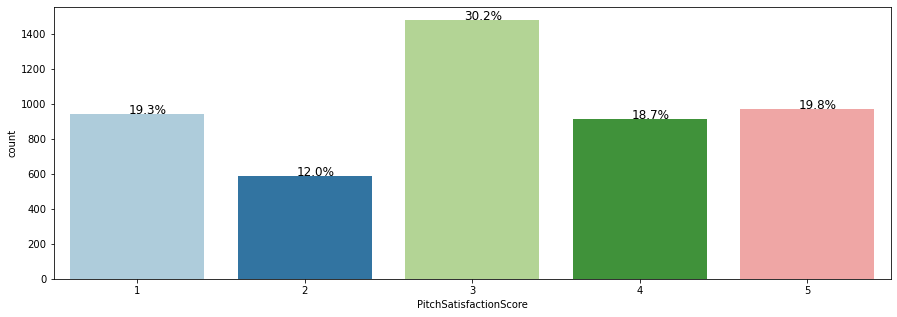

In [31]:
perc_on_bar('PitchSatisfactionScore')

- 19.3% of the customers gave the pitch a score of 1
- 12% of the customers gave the pitch a score of 2
- 30.2% of the customers gave the pitch a score of 3
- 18.7% of the customers gave the pictch a score of 4
- 19.8% of the customers gave the pitch a score of 5

### Observations on OwnCar

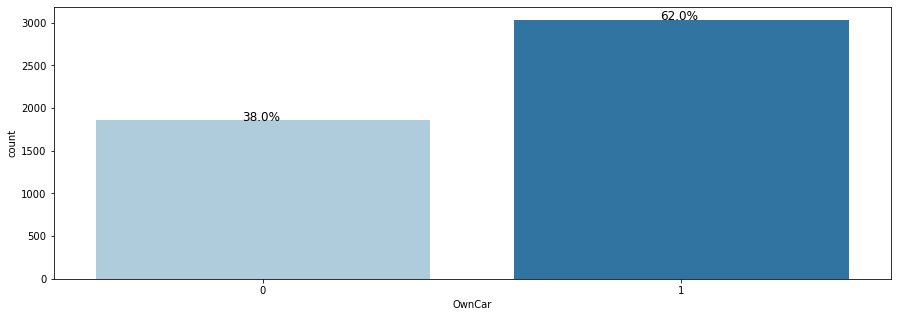

In [32]:
perc_on_bar('OwnCar')

- 38% of the customers don't own a car

### Observations on NumberOfChildrenVisiting

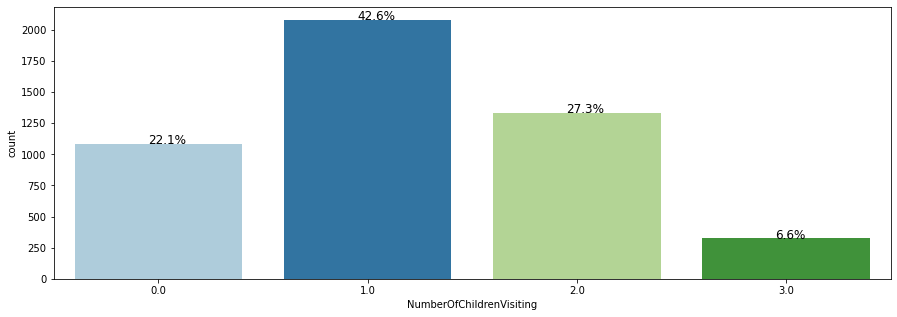

In [33]:
perc_on_bar('NumberOfChildrenVisiting')

- 22.1% of the customers will not be taking any children with them
- 42.6% of the customers will be taking 1 child under the age of 5 with them
- 27.3% of the customers will be taking 2 children under the age of 5 with them
- 6.6% of the customers will be taking 3 children under the age of 5 with them

### Observations on Designation

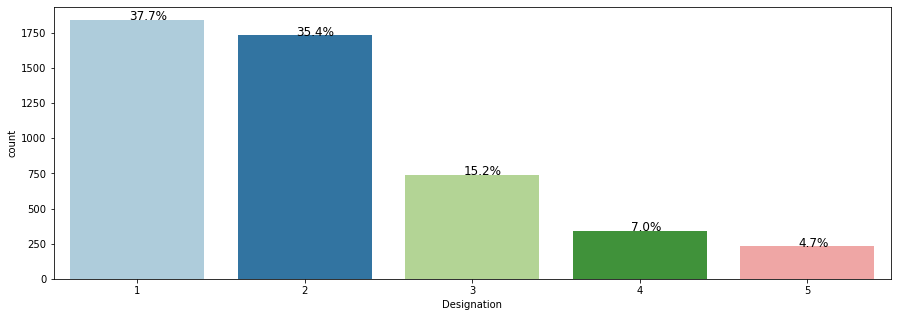

In [34]:
perc_on_bar('Designation')

- 37.7% of the customers are executives
- 35.4% of the customers are managers
- 15.2% of the customers are senior managers
- 7% of the customers are AVP
- 4.7% of the customers are VP

## Bivariate Analysis

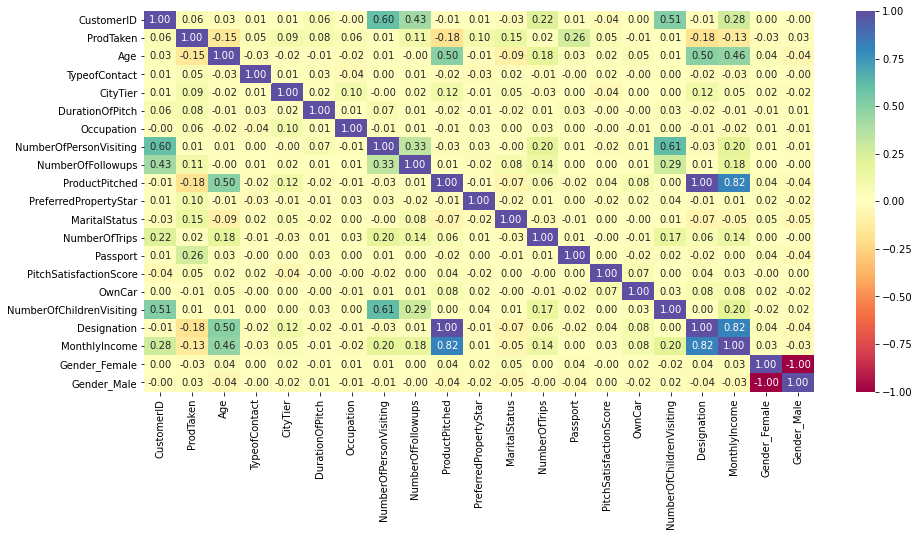

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(travelData.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

- Designation, MonthlyIncome, and ProductPitched have a high correlation - this makes sense, those with a higher income/designation usually are more likely to get a product pitched to them
- NumberOfPersonVisiting, NumberOfFollowups and NumberOfChildrenVisiting have a high correlation
- Age, Designation and MonthlyIncome and ProdTaken have a negative correlation


In [36]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,travelData['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,travelData['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Observations on Prodtaken vs. TypeofContact

ProdTaken         0    1   All
TypeofContact                 
All            3946  917  4863
1.0            2837  607  3444
2.0            1109  310  1419
------------------------------------------------------------------------------------------------------------------------


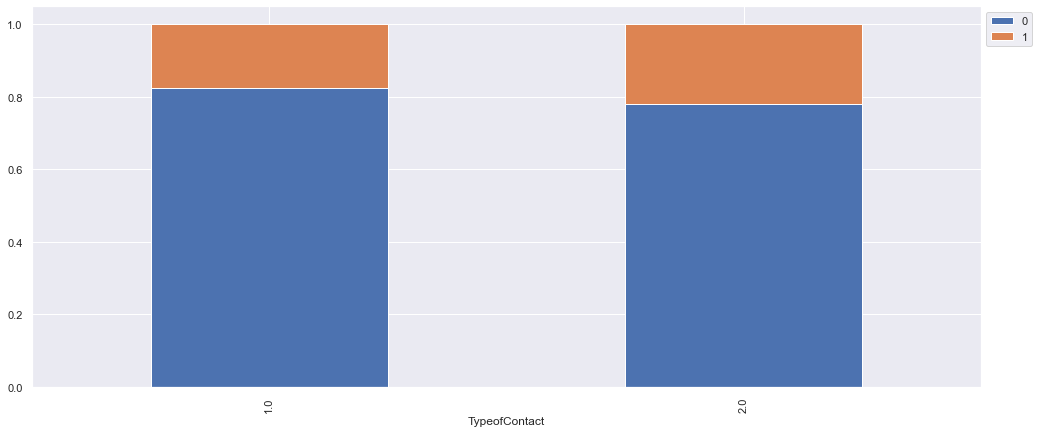

In [37]:
stacked_plot(travelData['TypeofContact'])

- 80% of the customers who were contacted through self enquiry did not purchase a travel package as opposed to the 20% who did
- 80% of the customers who were contacted through company invited did not purchase a travel package as opposed to the 20% who did


### Observations on ProdTaken vs. CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


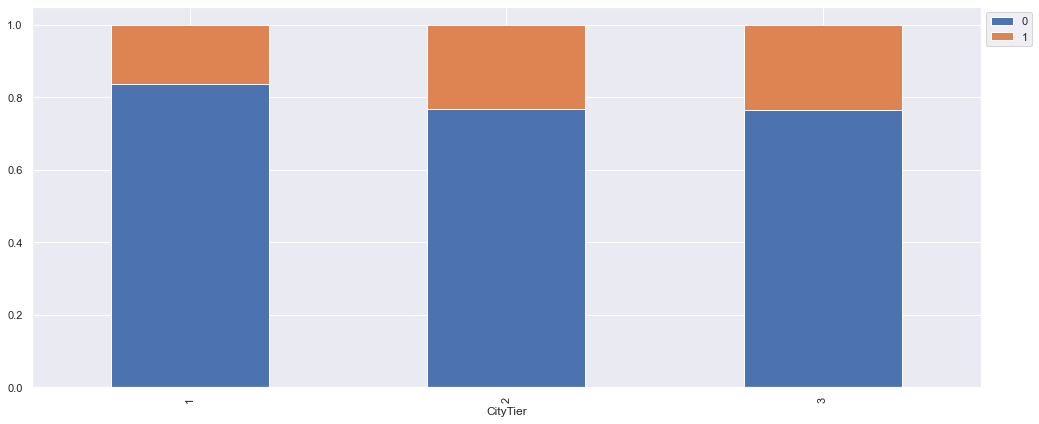

In [38]:
stacked_plot(travelData['CityTier'])

- A little above 80% of the customers in Tier 1 city did not purchase a travel package
- A little below 80% of the customers in Tier 2 and 3 cities did not purchase a travel package

### Observations on ProdTaken vs. Occupation

ProdTaken      0    1   All
Occupation                 
All         3968  920  4888
1           1954  414  2368
2           1700  384  2084
3            314  120   434
4              0    2     2
------------------------------------------------------------------------------------------------------------------------


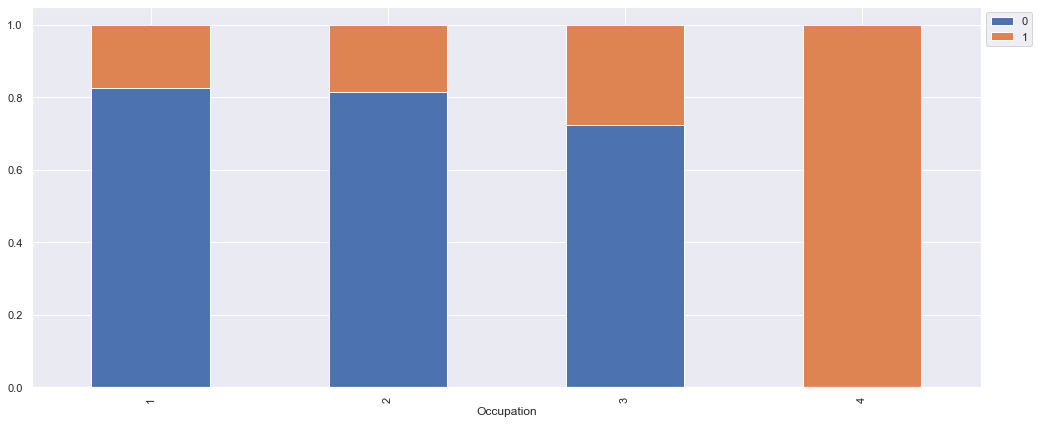

In [39]:
stacked_plot(travelData['Occupation'])

- 100% of the free lancers purchased a travel package
- Of salaried customers, only 17.5% of the customers purchased a travel package
- Of small business customers, only 18.4% of the customers purchased a travel package
- Of large business customers, only 27.6% of the customers purchased a travel package


### Observations on ProdTaken vs. NumberOfPersonVisiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


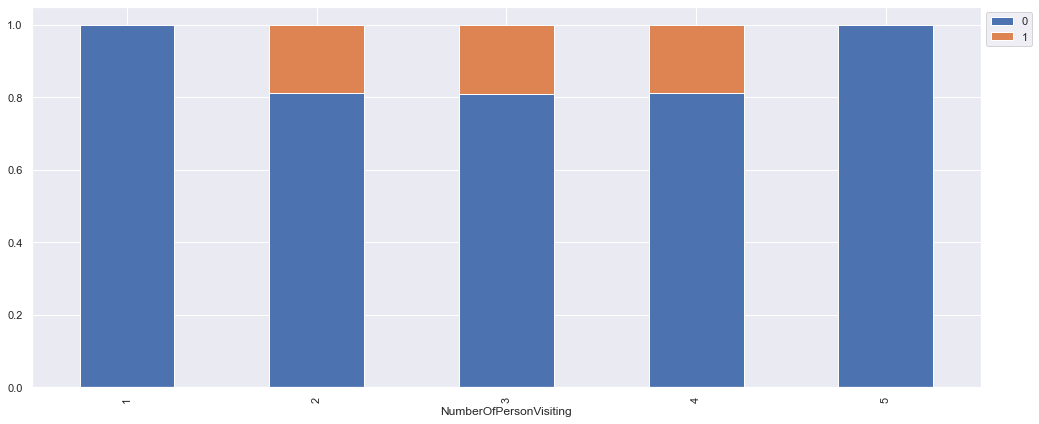

In [40]:
stacked_plot(travelData['NumberOfPersonVisiting'])

- Those travelling with 1 and 5 other people did not purchase a travel package
- 19.2% of those travelling with 3 other people did purchase a travel package
- 18.8% of those travelling with 2 and 4 other people did purchase a travel package

### Observations on ProdTaken vs. NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


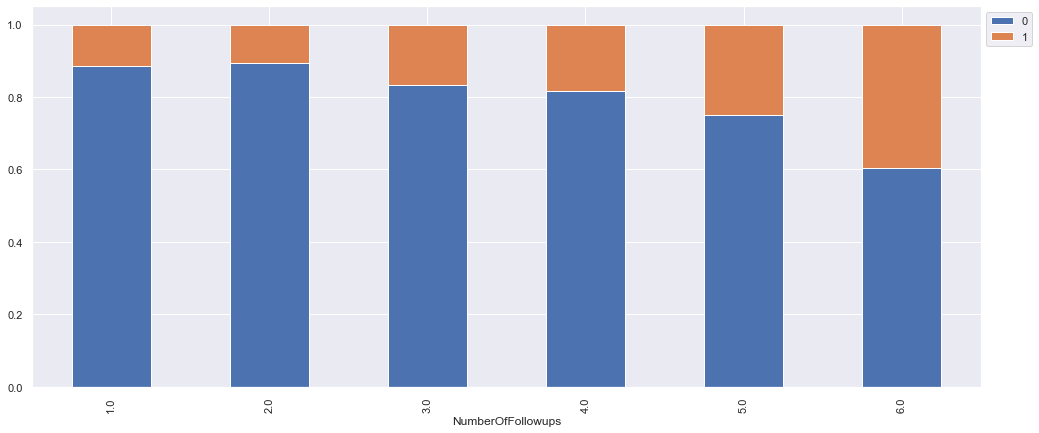

In [41]:
stacked_plot(travelData['NumberOfFollowups'])

- The more followups a customer was pitched, the more likely the customer purchased a travel package
- The customers who had 6 followups had 39.7% purchase a travel package

### Observations on ProdTaken vs. ProductPitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
1               1290  552  1842
2               1528  204  1732
3                618  124   742
4                322   20   342
5                210   20   230
------------------------------------------------------------------------------------------------------------------------


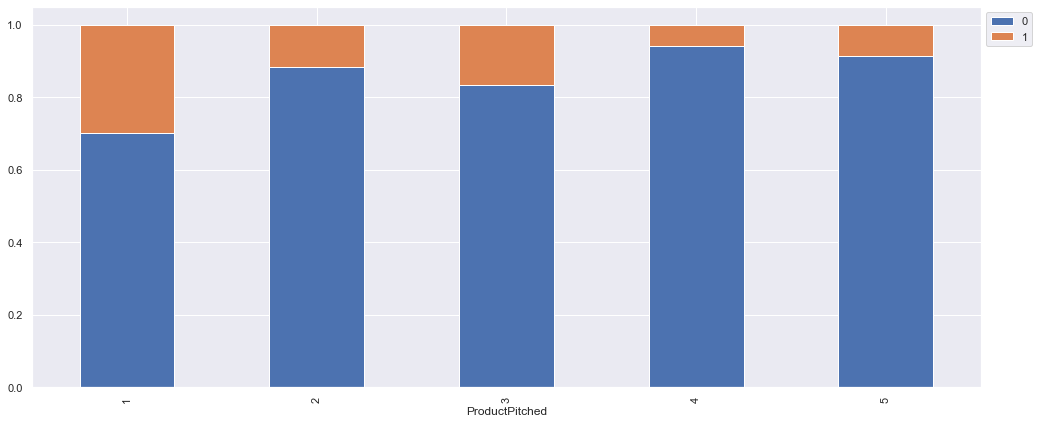

In [42]:
stacked_plot(travelData['ProductPitched'])

- Customers who had the basic package pitched had around 30% of them purchase a travel package
- While customers who had the super deluxe package pitched only had around 5.9% of them purchase a travel package

### Observations on ProdTaken vs. PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


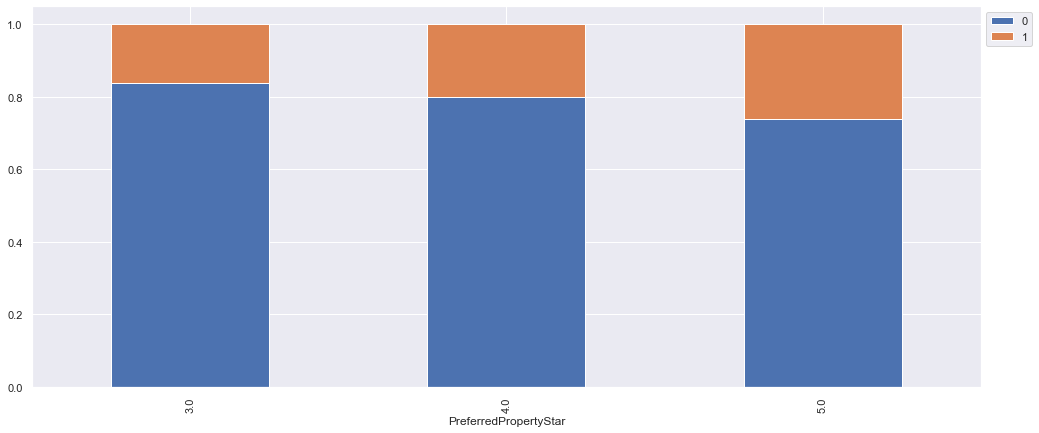

In [43]:
stacked_plot(travelData['PreferredPropertyStar'])

- Those who preferred 5 stars had the highest purchase rate at 26.1%
- Those who preferred 3 stars has the lowest purchase rate at 16.1%

### Observations on ProdTaken vs. MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
1              2014  326  2340
3               612  304   916
4               516  166   682
2               826  124   950
------------------------------------------------------------------------------------------------------------------------


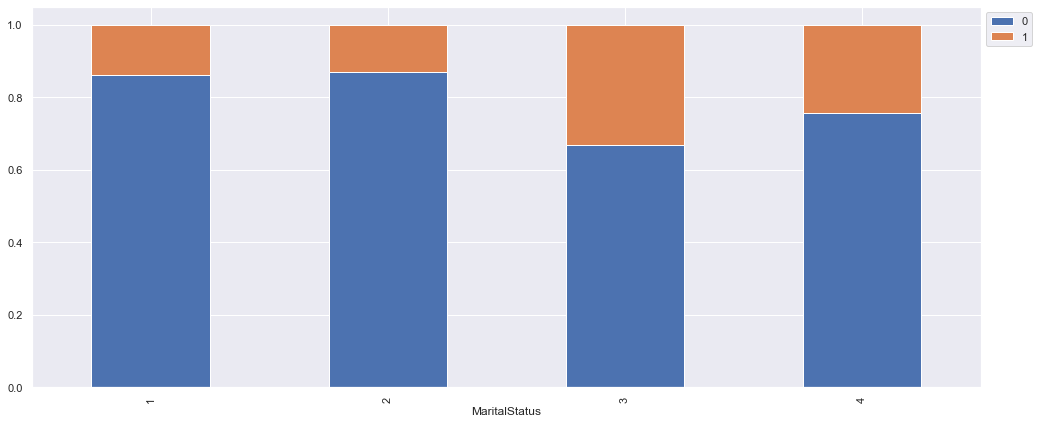

In [44]:
stacked_plot(travelData['MaritalStatus'])

- Single customers had the highest purchase rate at 33.2%
- Obviously, divorced customers had the lowest purchase rate at 13%

### Observations on ProdTaken vs. Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


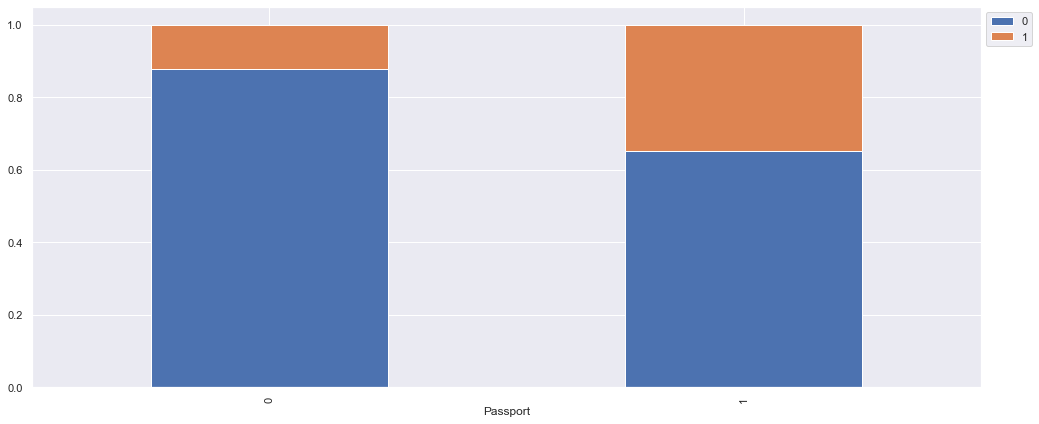

In [45]:
stacked_plot(travelData['Passport'])

- Of those with a passport, 34.7% customers purchased a travel package
- Of those without a passport, only 12.3% customers purchased a travel package

### Observations on ProdTaken vs. PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


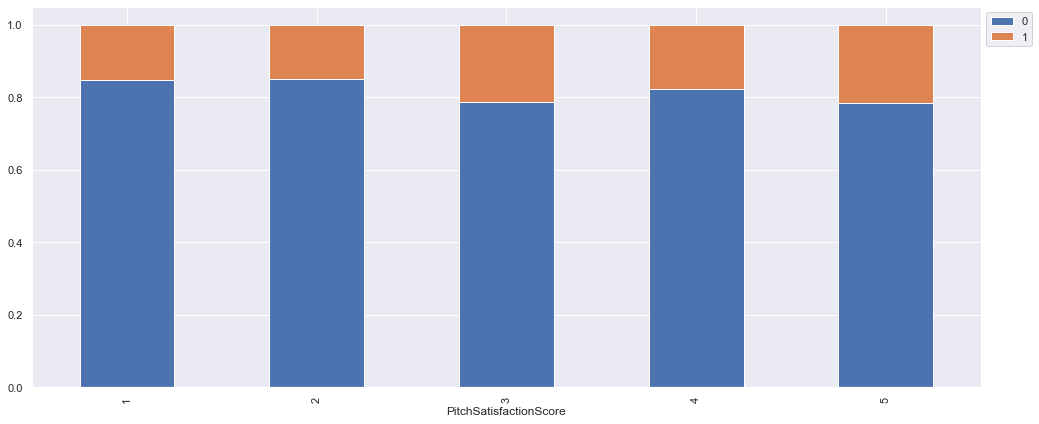

In [46]:
stacked_plot(travelData['PitchSatisfactionScore'])

### Observations on ProdTaken vs. NumberOfChildrenVisiting

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


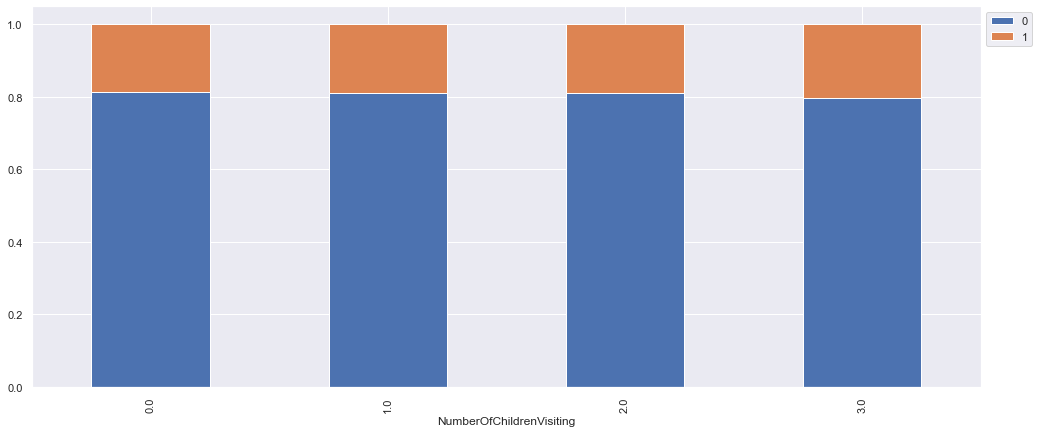

In [47]:
stacked_plot(travelData['NumberOfChildrenVisiting'])

### Observations on ProdTaken vs. Designation

ProdTaken       0    1   All
Designation                 
All          3968  920  4888
1            1290  552  1842
2            1528  204  1732
3             618  124   742
4             322   20   342
5             210   20   230
------------------------------------------------------------------------------------------------------------------------


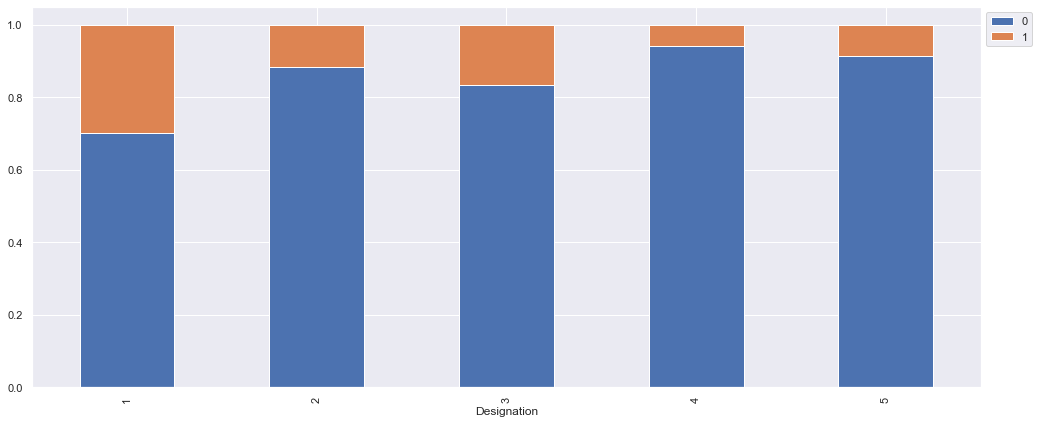

In [48]:
stacked_plot(travelData['Designation'])

In [49]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of a customer who purchased a travel package',fontsize=12,fontweight='bold')
    sns.distplot(travelData[(travelData[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of a customer who purchased a travel package",fontsize=12,fontweight='bold')
    sns.distplot(travelData[(travelData[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t ProdTaken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(travelData[target],travelData[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t ProdTaken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(travelData[target],travelData[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### Observations on ProdTaken vs. Age

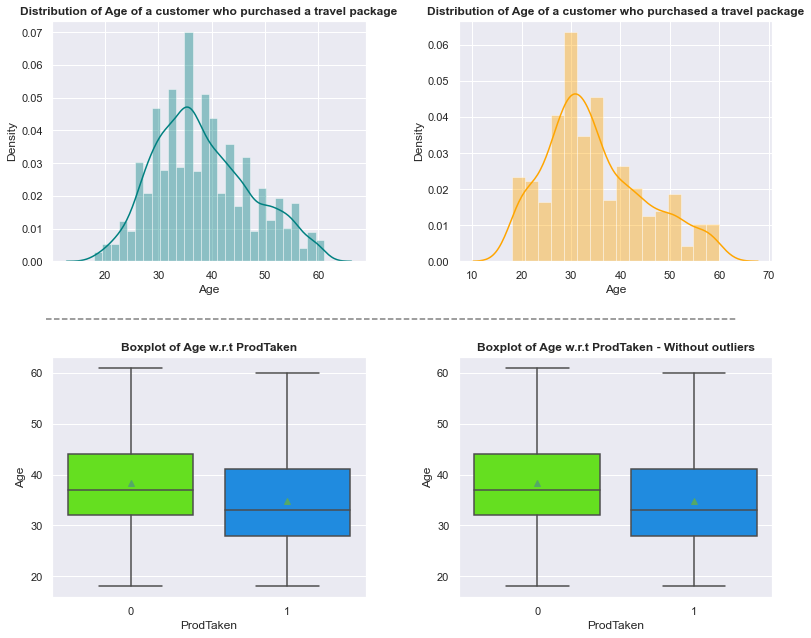

In [50]:
plot('Age')

- Age doesn't seem to be a good indicator as to whether a customer purchases a travel package or not, data seems to be pretty evenly split 

### Observations on ProdTaken vs. NumberOfTrips

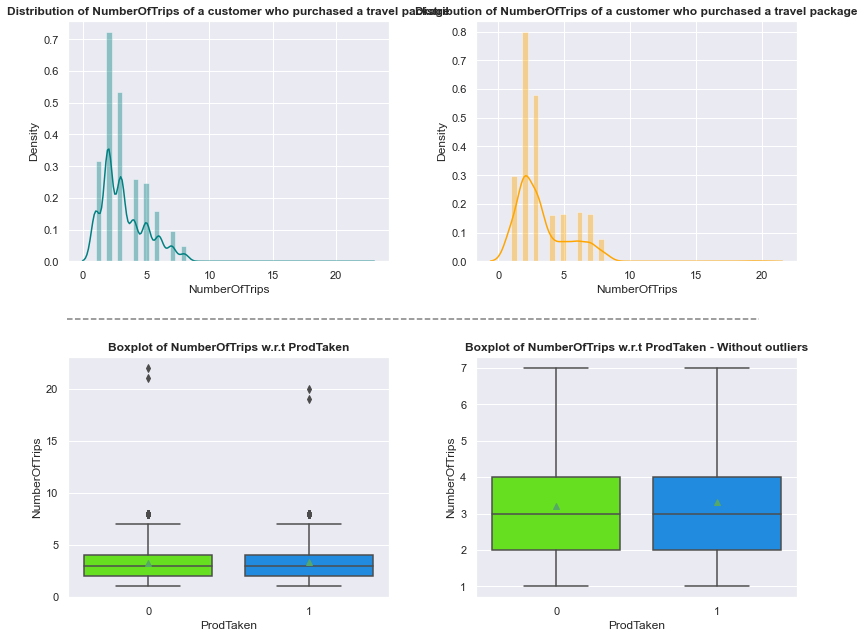

In [51]:
plot('NumberOfTrips')

- NumberOfTrips isn't a good indicator of whether the travel package will be purchased or not

## 3. Data Processing/Cleaning

### Check and treat for missing values

In [52]:
#Checking for missing values
travelData.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [53]:
travelData[travelData["Age"].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Gender_Female,Gender_Male
4,200004,0,NaN,1.0,1,8.0,2,2,3.0,1,...,2,1.0,0,5,1,0.0,1,18468.0,0,1
11,200011,0,NaN,1.0,1,21.0,1,2,4.0,2,...,3,1.0,1,3,0,0.0,2,NaN,1,0
19,200019,0,NaN,1.0,1,8.0,1,2,3.0,1,...,3,6.0,1,4,0,1.0,1,NaN,0,1
20,200020,0,NaN,2.0,1,17.0,1,3,2.0,2,...,1,1.0,0,3,1,2.0,2,NaN,1,0
21,200021,1,NaN,1.0,3,15.0,1,2,4.0,2,...,3,1.0,0,2,0,0.0,2,18407.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,202410,1,NaN,1.0,1,30.0,2,2,3.0,1,...,1,2.0,1,1,0,0.0,1,NaN,0,1
2413,202413,1,NaN,1.0,3,21.0,2,2,5.0,2,...,1,7.0,1,1,0,1.0,2,18423.0,0,1
2427,202427,1,NaN,1.0,3,22.0,2,3,3.0,3,...,1,3.0,0,5,0,1.0,3,18544.0,0,1
2430,202430,1,NaN,1.0,1,14.0,2,3,3.0,1,...,1,2.0,1,3,0,2.0,1,NaN,1,0


In [54]:
#Replace missing values with the median of that variable
travelData.loc[travelData.Age.isnull(), 'Age'] = travelData.Age.median()
travelData.loc[travelData.DurationOfPitch.isnull(), 'DurationOfPitch'] = travelData.DurationOfPitch.median()
travelData.loc[travelData.NumberOfFollowups.isnull(), 'NumberOfFollowups'] = travelData.NumberOfFollowups.median()
travelData.loc[travelData.PreferredPropertyStar.isnull(), 'PreferredPropertyStar'] = travelData.PreferredPropertyStar.median()
travelData.loc[travelData.NumberOfTrips.isnull(), 'NumberOfTrips'] = travelData.NumberOfTrips.median()

#Drop the rows with missing values since it doesn't make sense to impute for these variables
travelData = travelData[travelData["NumberOfChildrenVisiting"].notna()]
travelData = travelData[travelData["TypeofContact"].notna()]

#Drop CustomerID
travelData.drop('CustomerID', axis=1, inplace=True)


# Impute missing MonthlyIncome
travelData["MonthlyIncome"] = travelData.groupby(["Occupation", "Designation"])["MonthlyIncome"].transform(
    lambda x: x.fillna(x.median())
)

In [55]:
travelData.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Gender_Female               0
Gender_Male                 0
dtype: int64

- No more missing values

In [56]:
travelData.head(12)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Gender_Female,Gender_Male
0,1,41.0,1.0,3,6.0,1,3,3.0,2,3.0,3,1.0,1,2,1,0.0,2,20993.0,1,0
1,0,49.0,2.0,1,14.0,1,3,4.0,2,4.0,2,2.0,0,3,1,2.0,2,20130.0,0,1
2,1,37.0,1.0,1,8.0,4,3,4.0,1,3.0,3,7.0,1,3,0,0.0,1,17090.0,0,1
3,0,33.0,2.0,1,9.0,1,2,3.0,1,3.0,2,2.0,1,5,1,1.0,1,17909.0,1,0
4,0,36.0,1.0,1,8.0,2,2,3.0,1,4.0,2,1.0,0,5,1,0.0,1,18468.0,0,1
5,0,32.0,2.0,1,8.0,1,3,3.0,1,3.0,3,1.0,0,5,1,1.0,1,18068.0,0,1
6,0,59.0,1.0,1,9.0,2,2,2.0,1,5.0,2,5.0,1,2,1,1.0,1,17670.0,1,0
7,0,30.0,1.0,1,30.0,1,3,3.0,1,3.0,1,2.0,0,2,0,1.0,1,17693.0,0,1
8,0,38.0,2.0,1,29.0,1,2,4.0,3,3.0,4,1.0,0,3,0,0.0,3,24526.0,0,1
9,0,36.0,1.0,1,33.0,2,3,3.0,2,3.0,2,7.0,0,3,1,0.0,2,20237.0,0,1


### Summary of the Data

In [57]:
travelData.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4797.0,0.189702,0.392106,0.0,0.0,0.0,0.0,1.0
Age,4797.0,37.444444,9.050853,18.0,31.0,36.0,43.0,61.0
TypeofContact,4797.0,1.293934,0.455609,1.0,1.0,1.0,2.0,2.0
CityTier,4797.0,1.653950,0.916620,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4797.0,15.378153,8.326556,5.0,9.0,13.0,19.0,127.0
Occupation,4797.0,1.606004,0.648239,1.0,1.0,2.0,2.0,4.0
NumberOfPersonVisiting,4797.0,2.905774,0.725649,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4797.0,3.710236,0.997414,1.0,3.0,4.0,4.0,6.0
ProductPitched,4797.0,2.028560,1.085299,1.0,1.0,2.0,3.0,5.0
PreferredPropertyStar,4797.0,3.575777,0.796116,3.0,3.0,3.0,4.0,5.0


- Total number of data now at 4797
- No missing Values

## 4. Outlier Treatment

In [58]:
Q1 = travelData.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = travelData.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [59]:
((travelData.select_dtypes(include=['float64','int64'])<lower) | (travelData.select_dtypes(include=['float64','int64'])>upper)).sum()/len(travelData)*100

Age                          0.000000
CityTier                     0.000000
Designation                  0.000000
DurationOfPitch              2.272253
Gender_Female                0.000000
Gender_Male                  0.000000
MaritalStatus                0.000000
MonthlyIncome                6.920992
NumberOfChildrenVisiting     0.000000
NumberOfFollowups            6.378987
NumberOfPersonVisiting       0.062539
NumberOfTrips                2.251407
Occupation                   0.041693
OwnCar                       0.000000
Passport                     0.000000
PitchSatisfactionScore       0.000000
PreferredPropertyStar        0.000000
ProdTaken                   18.970190
ProductPitched               0.000000
TypeofContact                0.000000
dtype: float64

- After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in DurationOfPitch, MonthlyIncome, NumberOfFollowups, NumberOfPersonVisiting, NumberOfTrips, etc) and we would want our model to learn the underlying pattern for such customers.

## 5. Model Building

### Split the data into train and test sets

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function.

In [60]:
X = travelData.drop("ProdTaken" , axis=1)
y = travelData.pop("ProdTaken")

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [62]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Building the model
- We are going to build 3 ensemble models here - Decision Tree Classifier, Bagging Classifier and Random Forest Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### Decision Tree

In [64]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [65]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.9097222222222222
Recall on training set :  1.0
Recall on test set :  0.7655677655677655
Precision on training set :  1.0
Precision on test set :  0.76


### Bagging Classifier

In [66]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [67]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9937444146559428
Accuracy on test set :  0.9194444444444444
Recall on training set :  0.967032967032967
Recall on test set :  0.6776556776556777
Precision on training set :  1.0
Precision on test set :  0.8685446009389671


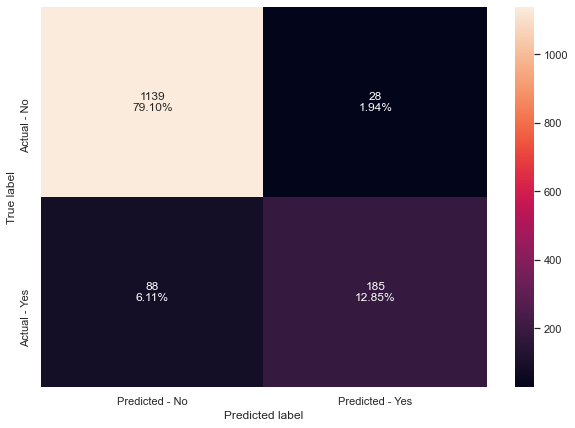

In [68]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [69]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [70]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9291666666666667
Recall on training set :  1.0
Recall on test set :  0.673992673992674
Precision on training set :  1.0
Precision on test set :  0.934010152284264


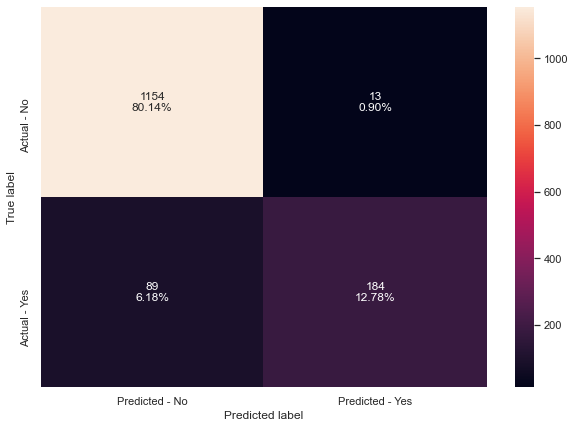

In [71]:
make_confusion_matrix(rf_estimator,y_test)

**With default parameters:**

- All three models are overfitting the data.
- In order of least to most overfitting: Decision Tree --> Bagging --> Random Forest
- Let's see if we can reduce overfitting and improve performance on test data by tuning the hyperparameters.

### Hyperparameter Tuning

### Decision Tree Classifier

In [72]:
%%time
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

Wall time: 2min 4s


DecisionTreeClassifier(max_depth=17, random_state=1)

In [73]:
dtree_tuned_score=get_metrics_score(dtree_tuned)

Accuracy on training set :  0.9964253798033958
Accuracy on test set :  0.9020833333333333
Recall on training set :  0.9827315541601256
Recall on test set :  0.7252747252747253
Precision on training set :  0.9984051036682615
Precision on test set :  0.75


### Insights
- Tuned model is still overfitting, if anything it got slightly worse by2%

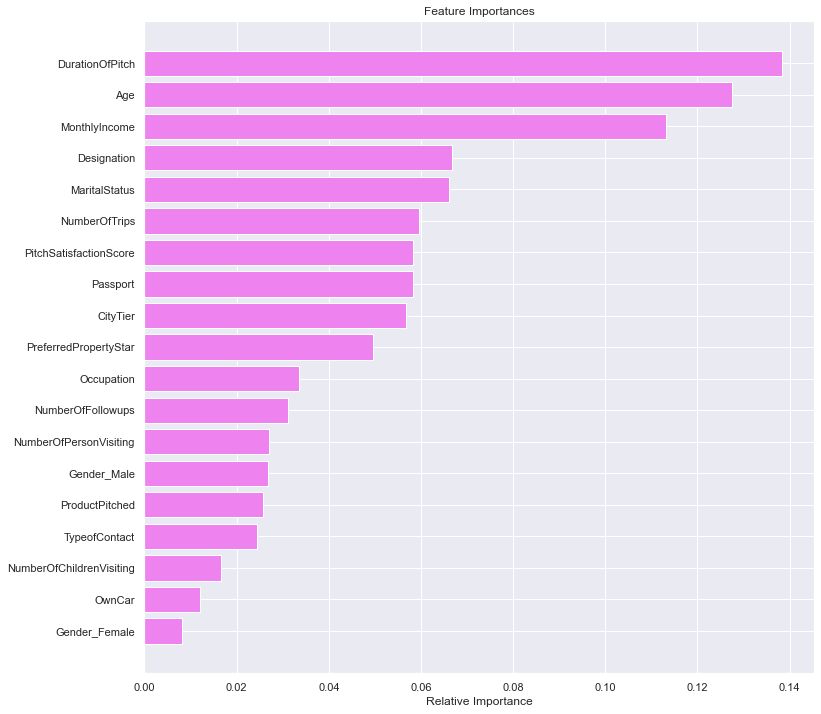

In [74]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Bagging Classifier

**Some of the important hyperparameters available for bagging regressor are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [75]:
%%time
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

Wall time: 1min 15s


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

**Let's check different metrics for bagging regressor with best hyperparameters and build a confusion matrix.**

In [76]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994042299672327
Accuracy on test set :  0.925
Recall on training set :  0.9984301412872841
Recall on test set :  0.684981684981685
Precision on training set :  0.9984301412872841
Precision on test set :  0.8947368421052632


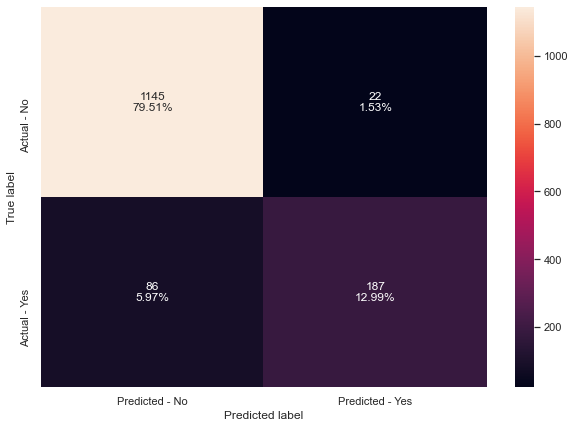

In [77]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Insights
- Model got worse with overfitting by 2%

### Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [78]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1),
                  random_state=1)

In [79]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8242478403336312
Accuracy on test set :  0.825
Recall on training set :  0.08948194662480377
Recall on test set :  0.09523809523809523
Precision on training set :  0.8507462686567164
Precision on test set :  0.8387096774193549


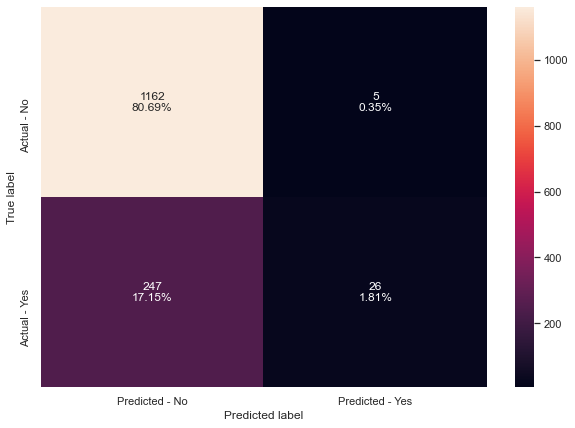

In [80]:
make_confusion_matrix(bagging_lr,y_test)

### Insights
- Bagging classifier with logistic regression as base_estimator is not a good model for representation as it leads to a horrible values for recall
- Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute.

### Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest regressor. Some of the important hyperparameters available for random forest regressor are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.


In [81]:
%%time
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

In [82]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Insights
- We can see that random forest's performance has decreased overfitting but this isn't that great of a model either since the recall values are small
- This means that the model is not good at identifying those who will purchase the travel package which is our primary aim here.

### Let's try using class_weights for random forest:

In [ ]:
%%time
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

In [ ]:
make_confusion_matrix(rf_estimator_weighted,y_test)

### Insights
- Overfitting is down compared to deault model but the recall values are not great

### Checking the feature importance

In [ ]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age, Passport and MonthlyIncome are the top 3 features

### Comparing all models till now

In [ ]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

- The two best models to choose would be the Random Forest with class_weights and the bagging classifier with default parameters
- Both of them are still overfit but they are the models with the highest train recall and least comparable overfitting
- The Tuned Random Forest Classifier has poor recall scores but with the least overfitting

## Building the model
- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate the three metrics -accuracy, recall and precision with a focus on recall 


### AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

### Insights
- The recall scores are low as well as underfitting

In [ ]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

### Insights
- Recall scores are better than AdaBoost but still low, however there is little overfitting

In [ ]:
make_confusion_matrix(gbc,y_test)

### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

### Insights
- Best model amongst the three with higher recall scores, however it is still overfitting

In [ ]:
make_confusion_matrix(xgb,y_test)

### Hyperparameter Tuning

### AdaBoost Classifier

- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [ ]:
%%time
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

In [ ]:
make_confusion_matrix(abc_tuned,y_test)

### Insights
- better than the default model with recall scores however the model is still overfitting

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- MonthlyIncome, Age and DurationOfPitch are the three most important feature as per the tuned AdaBoost model.

### Gradient Boosting Classifier

In [ ]:
%%time
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

- Gradient boosting isn't generalizing well enough but better than the AdaBoost Classifier

In [ ]:
%%time
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

In [ ]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
- The model performace has  increased slightly but it's also increased in overfitting


In [ ]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- MonthlyIncome is the most important feature, followed by Age and Passport, as per the tuned gradient boosting model

## Stacking Model

**Now, let's build a stacking model with the tuned models - bagging classifier, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Bagging Classifier', bagging_estimator),('Random Forest Tuned With Class Weights', rf_estimator_weighted),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [ ]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

In [ ]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

## Comparing all models

In [ ]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

- The Stacking Classifier model has the highest recall scores with some overfitting, this is followed by Gradient Boosting Tuned model but with lower recall scores

## 6. Conclusion

- **Note: A tuned XGBoost model was not run because after various attempts and hours waiting for a model, it wasn't completing, this could be due to the physical capabilities of the computer.**
- **Note: With better processing power - these models could be reiterated and tuned until we get much better options for model comparisons.**
- With respect to bagging classifiers, the Random Forest with Class Weights has the least overfitting with highest recall values followed by Bagging with Default Parameters which has higher recall values than the Random Forest but with more overfitting
- With respect to boosting classifiers, the Stacking Classifier model has the highest recall scores with some overfitting, this is followed by Gradient Boosting Tuned model but with lower recall scores
- In general none of these models would be adequate, they either have high recall scores with huge overfitting or low recall scores with minimal overfitting
- Keeping this in mind, the Stacking Classifier might be the best option to go with
 

## 7. Business Recommendations

 - It didn't matter whether a customer was contacted through self inquiry or company invited. Both ways had the same chance of customers purchasing a package (20%)
 - There is not a huge striking difference in customers who purchased in different city tiers. You can see the slightest increase in purchases as the tiers go from Tier 1 to 3.
 - Free lancers - although the sample is tiny is a good indication that they would be the perfect customer for this travel package. They have the freedom to work according to their time which means more oppurtunities to travel and fully utilize the package. Following this would be the large business customers, then the small business customers and lastly salaried customers. This is logical as the order goes from most to least income.
 - Those travelling with 1 or 5 people did not purchase the package - this could be because there were too little or too many people and didn't feel the package was worth it.
 - The more followups a customer was pitched, the more likely they were to purchase the package. Customers with 6 followups had 39.7% of customers purchase a travel package (highest).
 - Basic package had the highest purchase rate with the least purchases belonging to the super deluxe package
 - People who preferred 5 stars had the highest customer purchase rate
 - Passport customers were the majority of the purchasing customers = more international destinations
 - Executives and Senior Managers purchase more than any other designations, this makes sense as they probably earn more than any other designation.
 - Age and NumberOfTrips isn't a relevant enough variable in determining whether a customer purchases the package

## 8. References

- University of Texas Case_Study_Bike_Sharing.ipynb
- University of Texas Case_Study_DiabetesRisk_Prediction.ipynb
- University of Texas Ensemble_Hands-On_Bagging.ipynb
- University of Texas Ensemble_Hands-On_Boosting.ipynb